# 01. PET datasets

### 01.01 Dataset link: https://www.robots.ox.ac.uk/~vgg/data/pets/

### 01.02 Contents
- There are 3 types 
- Breed/ Head ROI/ Pixel Level trimap    
- Bread -> File names    
- Head ROI -> Pascal VOC Format
- trimap -> 1:foreground/2:background/3:nothing     

### 01.03 classification
- ID: 1:37 Class ids
- SPECIES: 1:Cat 2:Dog
- BREED ID: 1-25:Cat 1:12:Dog    
ex) Abyssinian_100 1 1 1 -> id:1, specis:1, breed: 1

### 2. Load the datas

In [1]:
import os

#### Image Directory Path

In [2]:
os.listdir('../../../../ai_data/pets')

['images.tar.gz', 'images', 'annotations.tar.gz', 'annotations']

In [3]:
main_data = '../../../../ai_data/pets'

#### Load the dir path

In [4]:
img_dir = os.path.join(main_data,'images') # inputs
bbox_dir =  os.path.join(main_data,'annotations/xmls') # Outputs
trimap_dir = os.path.join(main_data,'annotations/trimaps') #Outputs

#### Load the file at the list

In [5]:
image_test = os.listdir(img_dir)

In [6]:
len(image_test)

7393

In [7]:
os.path.splitext(os.listdir(img_dir)[0])

('beagle_148', '.jpg')

#### Filter the no jpg files

In [8]:
image_files = [fname for fname in os.listdir(img_dir) if os.path.splitext(fname)[-1] == ".jpg"]

In [9]:
len(image_files)

7390

#### Load the xml bounding box label

In [10]:
bbox_files = [fname for fname in os.listdir(bbox_dir) if os.path.splitext(fname)[-1] == ".xml"]

In [11]:
len(bbox_files)

3686

#### Load the trimap png files

In [12]:
trimap_files = [fname for fname in os.listdir(trimap_dir) if os.path.splitext(fname)[-1] == '.png']

In [13]:
len(trimap_files)

7390

#### Check the file names

In [38]:
print("image files =", image_files[0],"\nbbox_files =", bbox_files[0],"\ntrimap_files =", trimap_files[0])

image files = beagle_148.jpg 
bbox_files = British_Shorthair_148.xml 
trimap_files = japanese_chin_96.png


### Let's Draw and Check the files

In [48]:
import numpy as np
import random
from PIL import Image
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#### add file name and directory path 

In [49]:
random_index = random.randint(1,len(image_files))
random_index

330

#### Make Image full path

In [50]:
file_name = image_files[random_index]
file_name

'boxer_148.jpg'

In [51]:
image_path = os.path.join(img_dir,file_name)
image_path

'../../../../ai_data/pets/images/boxer_148.jpg'

#### Make xml full path

In [52]:
bbox_path = os.path.join(bbox_dir,os.path.splitext(file_name)[0]+'.xml')
bbox_path

'../../../../ai_data/pets/annotations/xmls/boxer_148.xml'

#### Make the trimaps path

In [53]:
trimap_path = os.path.join(trimap_dir,os.path.splitext(file_name)[0]+'.png')
trimap_path

'../../../../ai_data/pets/annotations/trimaps/boxer_148.png'

#### Draw the image

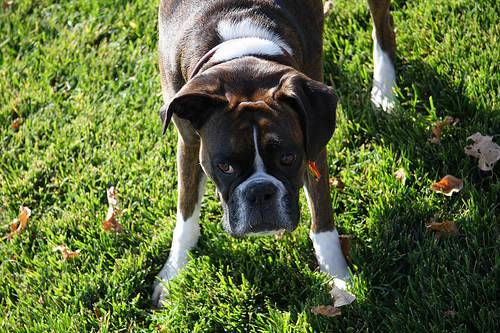

In [54]:
image = Image.open(image_path)
image

In [55]:
image = np.array(image)

#### Parsing the pascal xml files
- if there is no xml files, play again. because not all bounding box is made

In [56]:
tree = et.parse(bbox_path)

#### Let's parsing the xml files

```
<object>
<name>cat</name>
<pose>Frontal</pose>
<truncated>0</truncated>
<occluded>0</occluded>
<bndbox>
<xmin>333</xmin>
<ymin>72</ymin>
<xmax>425</xmax>
<ymax>158</ymax>
</bndbox>
<difficult>0</difficult>
</object>

<size>
<width>600</width>
<height>400</height>
<depth>3</depth>
</size>
```

#### parsing the xml

In [57]:
width = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)

x_min = float(tree.find('./object/bndbox/xmin').text)
y_min = float(tree.find('./object/bndbox/ymin').text)
x_max = float(tree.find('./object/bndbox/xmax').text)
y_max = float(tree.find('./object/bndbox/ymax').text)

#### Draw rectangle

In [58]:
rect_x = x_min
rect_y = y_min
rect_w = x_max-x_min
rect_h = y_max-y_min
rect = Rectangle((rect_x,rect_y),rect_w,rect_h,fill = False, color = 'red')

#### add rectangle to the image

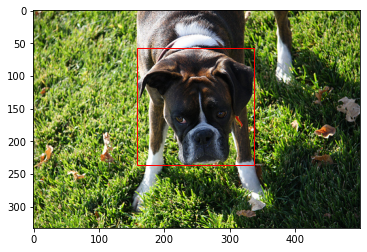

In [59]:
plt.axes().add_patch(rect)
plt.imshow(image)

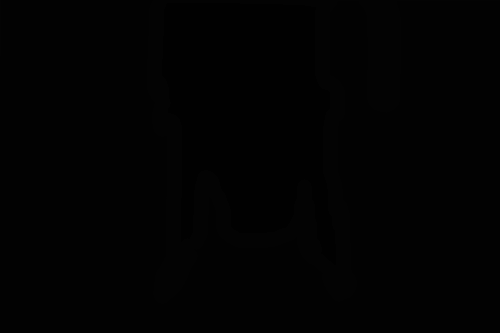

In [62]:
trimap_image = Image.open(trimap_path)mp
trimap_image

In [63]:
trimap_image = np.array(trimap_image)

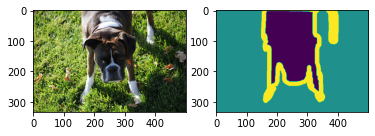

In [64]:
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(trimap_image)